# Plot Individual ROH
Make nice plots of whole genome, in Karyotype style.

Plot every chromosome: Centromer, and then list of ROH Blocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as pe
import h5py   # For Processing HDF5s
from scipy.stats import gaussian_kde

import socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)

if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
    print("Harald's Machine Detected")
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

#sys.path.append("./package/")
sys.path.insert(0,"./package/")  # hack to get local package
from hapsburg.PackagesSupport.pp_individual_roh_csvs import merge_called_blocks, post_process_roh_df
#from hapsburg_run import hapsb_chrom, hapsb_ind

from hapsburg.figures.plot_individual_roh import plot_roh_individual, plot_pde_indivdiual

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


In [3]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
print(f"Loaded {len(df1)} Individuals")
df1.sort_values(by="sum_roh>20", ascending=False)

Loaded 3738 Individuals


,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,lon,age,study,clst,mean_cov,n_cov_snp,include_alt,region,color,economy
1049,I1178,Israel_C,91.121798,703.154187,30,682.380788,26,625.101110,20,545.019401,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,2.383000,719331,1,Levante,blue,Agriculture
3086,Karitiana_11,Karitiana,71.722305,596.386334,37,494.799619,20,455.792115,16,392.679617,...,-63.000000,0.0,Lazaridis et al. 2014,Modern,NaN,553410,1,Karitiana,gainsboro,NaN
3141,Lebanese_6,Lebanese,59.008193,546.006877,29,511.061079,23,458.984076,18,358.673575,...,35.600000,0.0,Lazaridis et al. 2014,Modern,NaN,553090,1,Levante,gainsboro,NaN
2528,Pima_11,Pima,124.891199,543.410879,30,495.179579,21,422.557495,13,337.027990,...,-108.000000,0.0,Lazaridis et al. 2014,Modern,NaN,554855,1,Pima,gainsboro,NaN
3410,Surui_1,Surui,83.238797,571.983341,33,486.853216,18,447.016210,14,333.080091,...,-62.000000,0.0,Lazaridis et al. 2014,Modern,NaN,546003,1,Atlantic Coast,gainsboro,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,I11541_published,Kazakhstan_Georgievsky_MBA_published,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,...,57.040056,3717.0,NarasimhanPattersonScience2019,Kazakhstan_Georgievsky_MBA_published,1.119765,621186,1,Steppe,gold,Pastoralism
1308,I7642,Iberia_LN,4.121002,4.121002,1,0.000000,0,0.000000,0,0.000000,...,-0.486310,4784.0,OlaldeScience2019,Iberia_LN,0.906329,620981,1,Iberia,blue,Agriculture
1309,I12149_published,Pakistan_IA_Katelai_published,4.075288,4.075288,1,0.000000,0,0.000000,0,0.000000,...,72.349133,2850.0,NarasimhanPattersonScience2019,Pakistan_IA_Katelai_published,1.463987,620955,1,Central Asia,blue,Agriculture
1310,R123.SG,Italy_Imperial.SG,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,...,13.149861,1805.0,AntonioGaoMootsScience2019,Italy_Imperial.SG,0.739576,620368,1,Central Italy,blue,Agriculture


Saved figure to ./figures/dumpster/karyotype.png


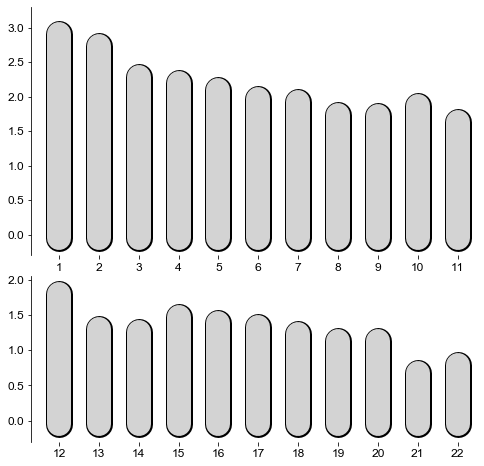

CPU times: user 3.01 s, sys: 61 ms, total: 3.07 s
Wall time: 3.07 s


In [7]:
%%time
#plot_roh_individual(iid="RMPR-1015", savepath="./figures/antonio_share/RMPR-1015_genome_roh.pdf", folder="./Empirical/1240k/Antonio/", title="RMPR-1015",
#                   plot_bad=False, prefix_out="", gap=0.5, output=False)  # MA89 #Ogl_5
#plot_roh_individual(iid="IPK12", savepath="", folder="./Empirical/1240k/SA_Readcounts/", 
#                   prefix_out="", min_cm=4, plot_bad=False)  # MA89 #Ogl_5
plot_roh_individual(iid="PC537.SG", savepath="./figures/dumpster/karyotype.png", folder="./Empirical/Eigenstrat/Reichall/final/", title="",
                    min_cm=4, plot_bad=False, prefix_out="", gap=0.5, output=False)  # MA89 #Ogl_5

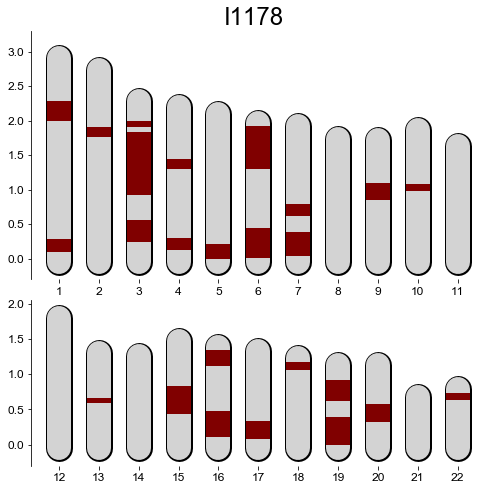

In [5]:
plot_roh_individual(iid="PC537.SG", folder="./Empirical/Eigenstrat/Reichall/final/", 
                    prefix_out="", min_cm=8, plot_bad=False, gap=1.0)  # MA89 #Ogl_5

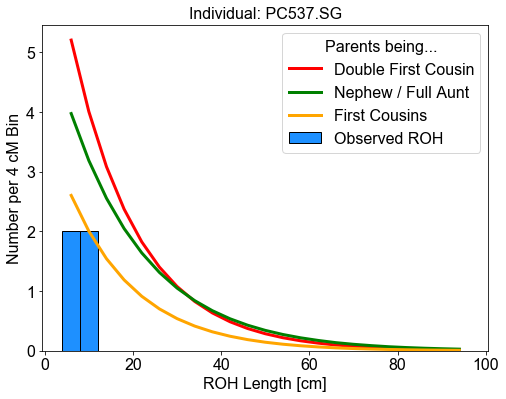

In [12]:
plot_pde_indivdiual(iid='PC537.SG', min_cm=4, snp_cm=50, bw_cm=4, kde_plot=False, 
                    plotlim=[4, 100], savepath='', folder='./Empirical/Eigenstrat/Reichall/final/', 
                    prefix_out='', output=False, gap=0.5)

# Plot Chalcolithic Inidividual I1178
[Supp. Fig. 2]
Individual with the highest ROH

Saved figure to ./figures/manuscript/supfig_I1178/karyotype.pdf


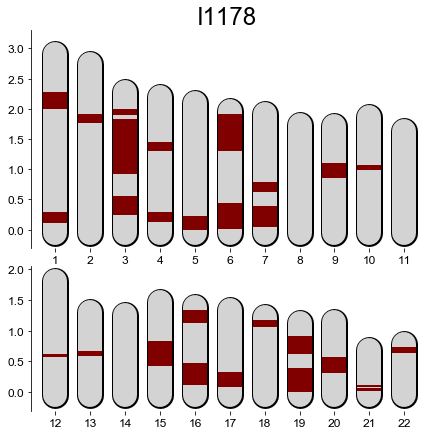

In [4]:
plot_roh_individual(iid="I1178", figsize=(7, 7), folder="./Empirical/Eigenstrat/Reichall/final/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=1.0,
                    savepath="./figures/manuscript/supfig_I1178/karyotype.pdf")  # MA89 #Ogl_5

Saved to ./figures/manuscript/supfig_I1178/density_roh.pdf


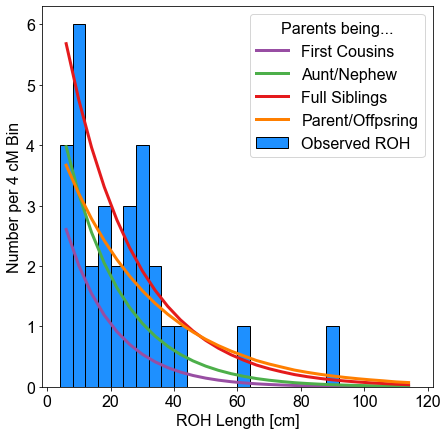

In [7]:
plot_pde_indivdiual(iid='I1178', figsize=(7,7), min_cm=4, snp_cm=50, bw_cm=4, kde_plot=False, 
                    plotlim=[4, 120],
                    folder='./Empirical/Eigenstrat/Reichall/final/',
                    comm_ancs=[4,4,4,2], ms=[6,5,4,3], 
                    labels=["First Cousins", "Aunt/Nephew", "Full Siblings", "Parent/Offpsring"],
                    cs=["#984ea3", "#4daf4a", "#e41a1c", "#ff7f00"],
                    savepath="./figures/manuscript/supfig_I1178/density_roh.pdf",
                    lw_curve=3, prefix_out='', output=False, gap=0.5)

# Legacy
Code was developed here

# Plot Distribution of different Relatedness Classes

In [6]:
def expected_block_pdf(x, chr_l, m):
    """Gives back the pdfs for Blocks of Length l [Morgan]
    on a Chromosome of Length [Morgan].
    m: Nr of Meiosis.
    Return PDF (per Morgan)"""
    pdf0 = (chr_l - x) * m**2 * np.exp(-x * m)
    pdf1 = 2 * np.exp(- x * m) * m 
    return (pdf0 + pdf1) * (x < chr_l)  # If x < chr_l return 0

def expected_block_pdf_chromosomes(x, chr_lgts, m):
    """Calculate the PDF of ROH blocks of length x [Morgan]
    for m Recombination events
    x: Can be Array
    chr_lgts: Array of all chromosome lengths [in Morgan]
    Return PDF (per Morgan)"""
    pdfs = [expected_block_pdf(x, chr_l, m) for chr_l in chr_lgts]
    pdf_full = np.sum(pdfs, axis=0)
    return pdf_full

def coal_prob(m, comm_anc=1):
    """Calculate Coalescence Probability.
    m: Nr of Meiosis
    comm_anc: How many common ancestors"""
    c_prob = comm_anc * (1 / 2) ** m
    return c_prob

def exp_blocks_full_individual(x, m, comm_anc=1):
    """Calculates the Expected Nr of ROH Blocks per Morgan for full Individual
    x: Array of Block Lenths
    m: Nr of Meisois
    comm_anc: Nr of Ancestry Loops"""
    chr_lgts = [chrom_length(ch)[1] for ch in range(1,23)]
    pdf_full = expected_block_pdf_chromosomes(x, chr_lgts, m)
    c_prob = coal_prob(m, comm_anc)
    exp_blocks = pdf_full * c_prob
    return exp_blocks

In [14]:
### Create Some Test Case
ch_lgts = [chrom_length(ch)[1] for ch in range(1,23)]
print(np.sum(ch_lgts)) ## Total Length of Human Genome (in Morgan)
#ch_lgts

35.44562


In [8]:
def plot_pde_indivdiual(iid="MA89", min_cm=4, snp_cm=50, bw_cm=4, kde_plot=False, plotlim=[4,100], savepath="", 
                        folder="./Empirical/1240k/", prefix_out="e01/", output=False, gap=0.0):
    """Plot Histograms/PDEs of ROH Distribution for one Individual
    bw_cm: Length of one Bin (in cM)"""
    #########################
    ### Load And Prepare Data
    df_rohs = load_individual_roh(iid=iid, min_cm=min_cm, snp_cm=snp_cm, 
                                  folder=folder, prefix_out=prefix_out, output=output, gap=gap)
    df_roh = pd.concat(df_rohs)

    bins = np.arange(plotlim[0], plotlim[1], bw_cm)
    bin_mean = (bins[1:] + bins[:-1]) / 2.0  # Mean of each bin

    block_pdf1 = exp_blocks_full_individual(bin_mean/100, m=6, comm_anc=4)
    block_pdf2 = exp_blocks_full_individual(bin_mean/100, m=6, comm_anc=8)
    block_pdf3 = exp_blocks_full_individual(bin_mean/100, m=5, comm_anc=4)
    
    block_pdf4 = exp_blocks_full_individual(bin_mean/100, m=3, comm_anc=2)
    block_pdf5 = exp_blocks_full_individual(bin_mean/100, m=4, comm_anc=4)

    ### Do the Gaussian KDE:
    kde = gaussian_kde(df_roh["lengthM"]*100) # KDE per cM
    #kde = gaussian_kde()
    #######################
    ### Do the Actual Plot
    fs = 16

    plt.figure(figsize=(8,6))
    plt.hist(df_roh["lengthM"]*100, bins=bins, ec="k", fc="silver", label="Observed ROH")

    plt.plot(bin_mean, bw_cm * block_pdf2/100, c="#abd9e9", label="Double First Cousin", lw=3) # Plot Density Per cM (adjusted for bin width)
    #plt.plot(bin_mean, bw_cm * block_pdf3/100, c="green", label="Nephew / Full Aunt", lw=3) # Plot Density Per cM (adjusted for bin width)
    plt.plot(bin_mean, bw_cm * block_pdf1/100, c="#2c7bb6", label="First Cousins", lw=3) # Plot Density Per cM (adjusted for bin width)
    
    plt.plot(bin_mean, bw_cm * block_pdf4/100, c="#fdae61", label="Parent-Offspring", lw=3) # Plot Density Per cM (adjusted for bin width)
    plt.plot(bin_mean, bw_cm * block_pdf5/100, c="#d7191c", label="Full Siblings", lw=3) # Plot Density Per cM (adjusted for bin width)
    
    if kde_plot==True:
        plt.plot(bin_mean, bw_cm * kde(bin_mean) * len(df_roh), "k--", label="KDE of observed ROH", lw=2)

    plt.xlabel("ROH Length [cm]", fontsize=fs)
    plt.ylabel(f"Number per {bw_cm} cM Bin", fontsize=fs)
    plt.title(f"Individual: {iid}", fontsize=fs)
    leg = plt.legend(loc = "upper right", fontsize=fs)
    leg.set_title("Parents being...", prop = {'size':fs})
    
    plt.tick_params(axis='both', which='major', labelsize=fs)
    
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=200)
        print(f"Saved to {savepath}")
    plt.show()

Saved to ./figures/talk_harvard/MA89_density.png


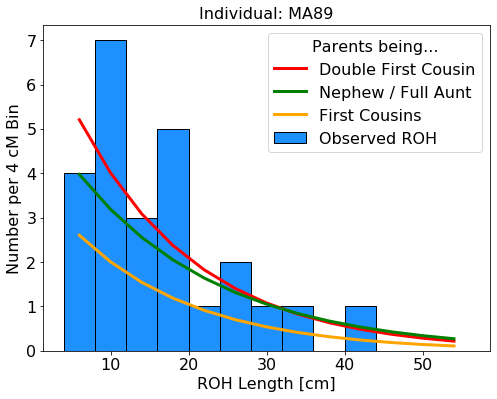

In [10]:
plot_pde_indivdiual(iid="MA89", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 60], 
                    savepath="./figures/talk_harvard/MA89_density.png", folder="./Empirical/1240k/MarcusAncs/") # Ogl_5

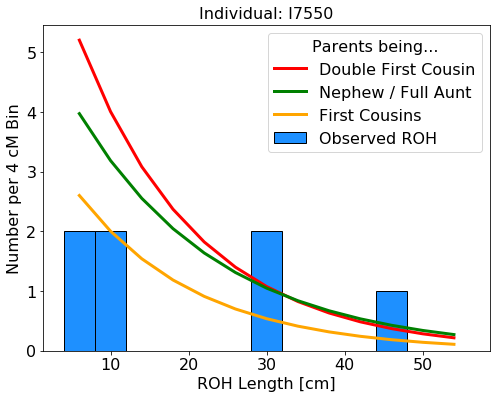

In [25]:
plot_pde_indivdiual(iid="I1178", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 60], 
                    savepath="", folder="./Empirical/Eigenstrat/Olalde19/", prefix_out="") # Ogl_

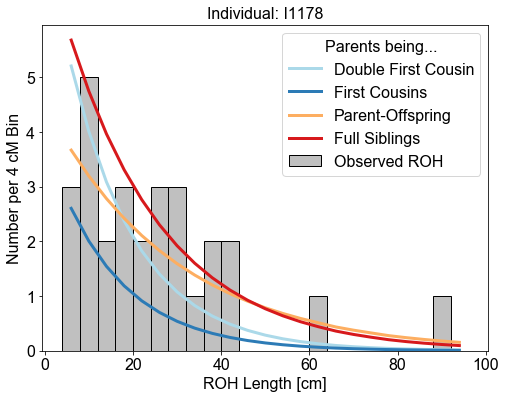

In [23]:
plot_pde_indivdiual(iid="I1178", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 100], gap=1.0,
                    savepath="", folder="./Empirical/Eigenstrat/Reichall/final/", prefix_out="") # ./figures/antonio_share/RMPR-1015_hist.pdf

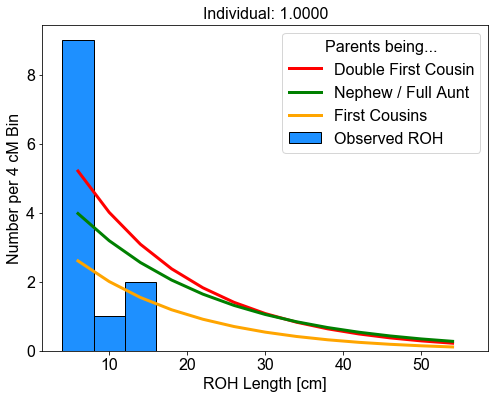

In [11]:
plot_pde_indivdiual(iid="1.0000", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 60], gap=0.5,
                    savepath="", folder="./Empirical/1240k/SA_Readcounts/Downsample_Ust_Ishim/", prefix_out="") 

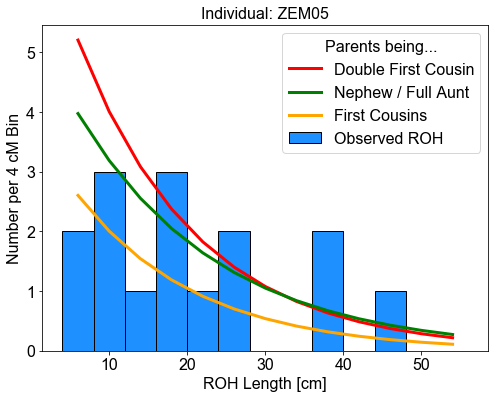

In [55]:
plot_pde_indivdiual(iid="ZEM05", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 60], gap=0.5,
                    savepath="", folder="./Empirical/Eigenstrat/Freilich20/", prefix_out="") 

### Calculate Numerical Expecations for NR and Sum of ROH

In [30]:
### Sanity Check: Calculate total expected Block Sharing Lengths:
x_arr = np.linspace(0.04, 2.0, 1000)
bin_width=x_arr[1] - x_arr[0]

block_pdf = exp_blocks_full_individual(x_arr+bin_width/2, m=8, comm_anc=4)  # That should be full first Cousin m=6/comm_ancs=4
e_blocks = block_pdf * bin_width

e_lengths = e_blocks * x_arr

print(f"Total Expected Nr of Blocks: {np.sum(e_blocks):.4f}")
print(f"Expected Sum of Block Sharing: {np.sum(e_lengths)*100:.4f} cM")

Total Expected Nr of Blocks: 3.3869
Expected Sum of Block Sharing: 52.4242 cM


In [28]:
x_arr = np.linspace(0.04, 0.08, 1000)
bin_width=x_arr[1] - x_arr[0]

block_pdf = exp_blocks_full_individual(x_arr+bin_width/2, m=8, comm_anc=4)  # That should be full first Cousin m=6/comm_ancs=4
e_blocks = block_pdf * bin_width

e_lengths = e_blocks * x_arr

print(f"Total Expected Nr of Blocks: \
      {np.sum(e_blocks):.4f}")
print(f"Expected Sum of Block Sharing: \
      {np.sum(e_lengths)*100:.4f} cM")

Total Expected Nr of Blocks:       0.9864
Expected Sum of Block Sharing:       5.8058 cM


# Legacy, code now moved to figure folder in package

In [ ]:
def load_roh(iid, ch, path_folder = "./Empirical/1240k/", prefix_out = "e01/"):
    """Load the ROH Dataframe for Individual iid and 
    Chromosome ch"""
    path = path_folder +  iid + "/chr" + str(ch) + "/" + prefix_out+ "/roh.csv"
    roh_df = pd.read_csv(path)    
    return roh_df

def post_process_roh_df1(df, min_cm=4, snp_cm=100, output=False):
    """Post Process ROH Dataframe.
    min_cm: Minimum Length in CentiMorgan
    snp_cm: How many SNPs per CentiMorgan"""
    densities = df["length"] / (df["lengthM"] * 100)
    densities_ok = (densities > snp_cm)
    
    df["SNP_Dens"] = densities
    
    # Filter for SNP Density:
    df = df[densities_ok]
    
    # Filter for Length:
    length_okay = (df["lengthM"] * 100) > min_cm
    
    if output==True:
        print(f"Min SNPs per cM> {snp_cm}: {np.sum(densities_ok)}/{len(densities_ok)}")
        print(f"> {min_cm} cM: {np.sum(length_okay)}/{len(length_okay)}")
    
    df = df[length_okay]
    return df

def load_h5(path, output=True):
        """Load and return the HDF5 File from Path"""
        f = h5py.File(path, "r")  # Load for Sanity Check. See below!
        if output == True:
            print("\nLoaded %i variants" % np.shape(f["calldata/GT"])[0])
            print("Loaded %i individuals" % np.shape(f["calldata/GT"])[1])
            # print(list(f["calldata"].keys()))
            # print(list(f["variants"].keys()))
            print(f"HDF5 loaded from {path}")
        return f
    
def chrom_length(ch, output=False):
    """Get and retrun length of Chromosome"""
    
    path1000G = "./Data/1000Genomes/HDF5/1240kHDF5/Eur1240chr" + str(ch) + ".hdf5"  # Path of 1000G (without chromosome part)
    f = load_h5(path1000G, output=output)
    rec = np.array(f["variants/MAP"])
    l = np.max(rec)
    return rec, l

def load_individual_roh(iid, min_cm=4, gap=0.0, snp_cm=50, path_folder = "./Empirical/1240k/", 
                        prefix_out = "e01/", folder="./Empirical/1240k/", output=False):
    """Load ROH of one Individual"""
    df_rohs = []
    for i in range(1,23):
        df_roh = load_roh(iid=iid, ch=i, path_folder = folder, prefix_out = prefix_out)
        df_roh = merge_called_blocks(df_roh, max_gap=gap/100, output=output) # Merge Blocks
        df_roh = post_process_roh_df(df_roh, min_cm=min_cm, snp_cm=snp_cm, output=output) # Only use Blocks with high enough SNP density
        df_rohs.append(df_roh)
    return df_rohs

def load_bad_areas(path="./Data/1000Genomes/Markers/1240k/snp_density.csv", min_snps=50):
    """Load areas of low SNP density, and return list of Dataframes 
    (one for each chromosome)"""
    df_lows = []
    
    for i in range(1,23):
        df_t = pd.read_csv(path, sep="\t")
        df_t = df_t[df_t["chr"]==i]
        df_t = df_t[df_t["counts"]<min_snps]
        df_lows.append(df_t)
    return df_lows

In [ ]:
def plot_chromosome(ax, l, x_pos, lw=24, df_roh = [], df_low = []):
    """Plot a Chromosome of length l with centromer ctr on ax 
    at x_pos"""
    ln, = ax.plot([x_pos, x_pos], [-0.05,l+0.05], lw = lw, color="lightgray",
                      solid_capstyle = 'round', zorder=0,
                  path_effects=[pe.Stroke(linewidth=lw+3, foreground='k'), pe.Normal()])
    
    ### Plot the ROH List if given
    if len(df_roh) > 0:
        starts, ends = df_roh["StartM"].values, df_roh["EndM"].values
        
        for i in range(len(df_roh)):
            ax.plot([x_pos, x_pos], [starts[i], ends[i]], lw=lw, color="maroon", 
                    zorder=1, alpha=1.0, solid_capstyle="butt")
    
    ### Plot shadows of bad areas
    if len(df_low)>0:
        starts, ends = df_low["StartM"].values, df_low["EndM"].values
        
        for i in range(len(df_low)):
            ax.plot([x_pos, x_pos], [starts[i], ends[i]], lw=lw, color="k", 
                    zorder=2, alpha=0.8, solid_capstyle="butt")
        
            
def plot_roh_individual(iid="MA89", fs=12, figsize=(8,8), savepath="", min_cm=4, snp_cm=50, gap=0.0,
                        folder="./Empirical/1240k/MarcusAncs/", prefix_out="e01/", plot_bad=True,
                        title=True, output=False):
    """Plot ROH in one ancient Individual.
    gap: What Gap to Merge [in cM!]"""
    
    ### Load the Data (could be done seperately)
    df_rohs = load_individual_roh(iid, min_cm=min_cm, snp_cm=snp_cm, gap=gap,
                                  folder=folder, prefix_out=prefix_out, output=output)
    if plot_bad:
        df_lows = load_bad_areas(min_snps=snp_cm)  # Load low density areas of the genome
    else:
        df_lows=[[] for _ in range(23)]
    
    plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2])
    gs.update(hspace=0.1) # set the spacing between axes. 

    ax = plt.subplot(gs[0]) # The left subplot
    ax1 = plt.subplot(gs[1]) # The middle one
        
    ### Plot the First 11 Chromosomes
    for i in range(1,12):
        rec, l = chrom_length(i)
        plot_chromosome(ax, l, x_pos=(i), df_roh=df_rohs[i-1], df_low=df_lows[i-1])  
    
    ### Plot the Second 11 Chromosomes
    for i in range(12,23):
        rec, l = chrom_length(i)
        plot_chromosome(ax1, l, x_pos=(i - 11), df_roh=df_rohs[i-1], df_low=df_lows[i-1])

    ### Set the Plot Limits
    ax.set_xlim([0.3, 11.5])
    ax1.set_xlim([0.3, 11.5])

    ax.set_ylim([-0.3,3.3])
    ax1.set_ylim([-0.3, 2.05])

    ### Turn off the Y Axis
    for ax0 in [ax, ax1]:
        ax0.spines['right'].set_visible(False)
        ax0.spines['top'].set_visible(False)
        ax0.spines['bottom'].set_visible(False)
        ax0.yaxis.set_tick_params(labelsize=fs)

    rang = np.arange(1,12)
    ax.set_xticks(rang)
    ax.set_xticklabels(rang, fontsize=fs)

    ax1.set_xticks(rang)
    ax1.set_xticklabels(rang+11, fontsize=fs)
    ax1.set_xticklabels(rang+11, fontsize=fs)

    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to {savepath}")
    
    if title:
        ax.set_title(iid, fontsize=fs*2)
    plt.show()

# Area 51

##Try Plotting various relationships in one plot

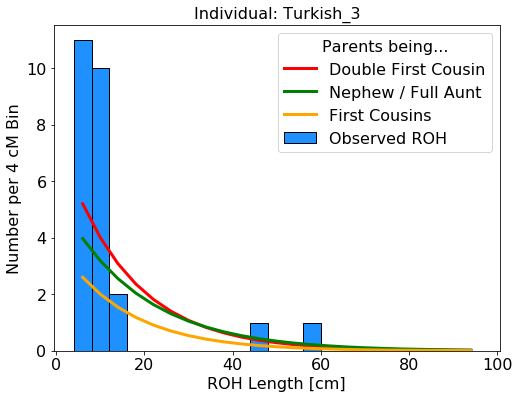

In [23]:
plot_pde_indivdiual(iid="Turkish_3", min_cm=3, bw_cm=4, kde_plot=False, plotlim=[4, 100], savepath="", folder="./Empirical/1240k/HO/") # Ogl_5

In [8]:
chr_lgts = [2.8426, 2.688187, 2.232549, 2.14201, 2.040477, 1.917145, 1.871491, 1.680018, 
            1.661367, 1.8090949, 1.5821669, 1.745901, 1.2551429, 1.1859521, 1.413411, 
            1.340264, 1.2849959, 1.175495, 1.0772971, 1.082123, 0.636394, 0.724438]

In [9]:
np.sum(chr_lgts)

35.388519800000005